# Assignment 3 - Credit Risk Scoring

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("01_Data/credit_train.csv")
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<IPython.core.display.Javascript object>

In [4]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<IPython.core.display.Javascript object>

In [6]:
# Remove missing values for target variable
data.dropna(subset=["Loan Status"], inplace=True)

<IPython.core.display.Javascript object>

In [7]:
# Impute missing values for annual income with the mean
data["Annual Income"].fillna(data["Annual Income"].mean(), inplace=True)

<IPython.core.display.Javascript object>

In [8]:
# Create default flag
data["default"] = data["Loan Status"].apply(lambda x: 0 if x == "Fully Paid" else 1)
# Create flag for short term vs long term
data["loan_term"] = data["Term"].apply(lambda x: 0 if x == "Short term" else 1)

<IPython.core.display.Javascript object>

In [9]:
# Rescale credit scores above 850
data["Credit Score"] = data["Credit Score"].apply(
    lambda val: (val / 10) if val > 850 else val
)

<IPython.core.display.Javascript object>

In [10]:
# Remove fields that are not needed
data.drop(labels=["Loan ID", "Customer ID", "Loan Status"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
data

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,default,loan_term
0,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1
1,262328.0,Short Term,NaN,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1
2,99999999.0,Short Term,741.0,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1
3,347666.0,Long Term,721.0,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1
4,176220.0,Short Term,NaN,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1
5,206602.0,Short Term,729.0,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0,1,1
6,217646.0,Short Term,730.0,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1
7,648714.0,Long Term,NaN,1.378277e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0,1,1
8,548746.0,Short Term,678.0,2.559110e+06,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1
9,215952.0,Short Term,739.0,1.454735e+06,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0,0,1


<IPython.core.display.Javascript object>

In [12]:
# Check initial number of observations - 100,000
print(len(data))
# Check number of observations if we remove rows with missing data - 36,423
data_dropna = data.dropna()
print(len(data_dropna))

100000
36423


<IPython.core.display.Javascript object>

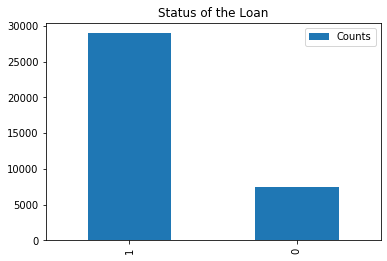

<IPython.core.display.Javascript object>

In [13]:
coffvalue = data_dropna[data_dropna["default"] == 0]["default"].count()
fpaidvalue = data_dropna[data_dropna["default"] == 1]["default"].count()
data_plot = {"Counts": [coffvalue, fpaidvalue]}
statusDF = pd.DataFrame(data_plot, index=[1, 0])
# statusDF.head()
statusDF.plot(kind="bar", title="Status of the Loan")

In [14]:
performing = data_dropna[data_dropna["default"] == 0]["default"].count()
defaults = data_dropna[data_dropna["default"] == 1]["default"].count()

count_defaults = {"Count default": [performing, defaults]}
count_defaults_df = pd.DataFrame(count_defaults, index=["Default", "Performing"])
count_defaults_df.head()

,Count default
Default,28972
Performing,7451


<IPython.core.display.Javascript object>

In [15]:
st = data_dropna[data_dropna["loan_term"] == 0]["loan_term"].count()
lt = data_dropna[data_dropna["loan_term"] == 1]["loan_term"].count()

count_term = {"Count term": [st, lt]}
count_term_df = pd.DataFrame(count_term, index=["Short term", "Long term"])
count_term_df.head()

,Count term
Short term,0
Long term,36423


<IPython.core.display.Javascript object>

## Variable transformation

### Credit Score

Since our problem is a classification problem, we can't have continuos variables in our dataframe. After the calculation of the missing variables we give our credit scores a range based on Experian's Credit Score Range.

In [16]:
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Poor" if np.isreal(val) and val < 580 else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val
)
data_dropna["Credit Score"] = data_dropna["Credit Score"].apply(
    lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val
)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

<IPython.core.display.Javascript object>

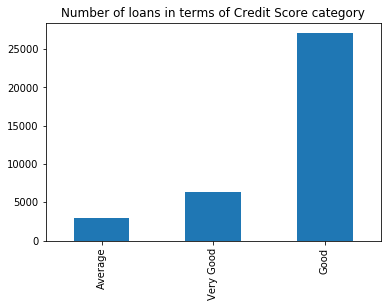

<IPython.core.display.Javascript object>

In [17]:
data_dropna["Credit Score"].value_counts().sort_values(ascending=True).plot(
    kind="bar", title="Number of loans in terms of Credit Score category"
)

## Univariate Analysis

Check if the explanatory variables have reasonable trends <br>
1. Credit score - yes (33% defaults for average, 20% defaults for good and 14% defaults for Very Good)

#### Credit Score

In [18]:
pd.crosstab(data_dropna["Credit Score"], data_dropna["default"])

default,0,1
Credit Score,,
Average,2004,998
Good,21499,5561
Very Good,5469,892


<IPython.core.display.Javascript object>

In [19]:
pd.crosstab(data_dropna["Credit Score"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Credit Score,,
Average,0.667555,0.332445
Good,0.794494,0.205506
Very Good,0.859770,0.140230


<IPython.core.display.Javascript object>

#### Current Loan Amount

In [20]:
# Drop values with current loan amount = 99999999.00
# Remove debt=0

<IPython.core.display.Javascript object>

In [21]:
data_dropna = data_dropna[data_dropna["Current Loan Amount"] != 99999999]
data_dropna = data_dropna[data_dropna["Monthly Debt"] != 0]
print(len(data_dropna))

31488


<IPython.core.display.Javascript object>

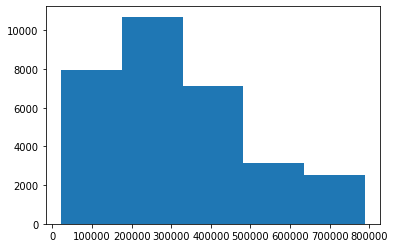

<IPython.core.display.Javascript object>

In [22]:
plt.hist(data_dropna["Current Loan Amount"], bins=5)
plt.show()

In [23]:
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 1: <=100 000" if np.isreal(val) and val <= 100000 else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 2: >100 000 and <=200 000 "
    if np.isreal(val) and val > 100000 and val <= 200000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 3: >200 000 and <=300 000 "
    if np.isreal(val) and val > 200000 and val <= 300000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 3: >300 000 and <=400 000 "
    if np.isreal(val) and val > 300000 and val <= 400000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 4: >400 000 and <=500 000 "
    if np.isreal(val) and val > 400000 and val <= 500000
    else val
)
data_dropna["Current Loan Amount"] = data_dropna["Current Loan Amount"].apply(
    lambda val: "LoanAmount 5: >500 000 " if np.isreal(val) and val > 500000 else val
)

<IPython.core.display.Javascript object>

#### Annual Income --> Debt to Income

In [24]:
data_dropna["Monthly Income"] = data_dropna["Annual Income"] / 12
data_dropna["Debt to Income"] = (
    data_dropna["Monthly Debt"] / data_dropna["Monthly Income"]
)

<IPython.core.display.Javascript object>

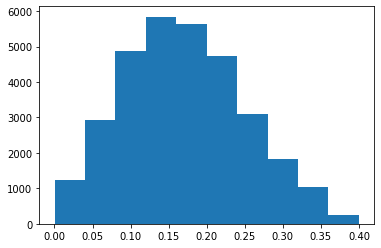

<IPython.core.display.Javascript object>

In [25]:
plt.hist(data_dropna["Debt to Income"], bins=10)
plt.show()

In [26]:
data_dropna["Debt to Income v2"] = data_dropna["Debt to Income"].apply(
    lambda x: "DTI 1: <=10%"
    if x <= 0.1
    else (
        "DTI 2: between 10 and 20%"
        if x > 0.10 and x <= 0.20
        else ("DTI 3: between 20 and 30%")
        if x > 0.20 and x <= 0.30
        else "DTI 4: >30%"
    )
)

<IPython.core.display.Javascript object>

In [27]:
pd.crosstab(data_dropna["Debt to Income v2"], data_dropna["default"])

default,0,1
Debt to Income v2,,
DTI 1: <=10%,5285,1150
DTI 2: between 10 and 20%,10869,3187
DTI 3: between 20 and 30%,6476,2457
DTI 4: >30%,1410,654


<IPython.core.display.Javascript object>

In [28]:
pd.crosstab(data_dropna["Debt to Income v2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Debt to Income v2,,
DTI 1: <=10%,0.821290,0.178710
DTI 2: between 10 and 20%,0.773264,0.226736
DTI 3: between 20 and 30%,0.724952,0.275048
DTI 4: >30%,0.683140,0.316860


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency of Default')

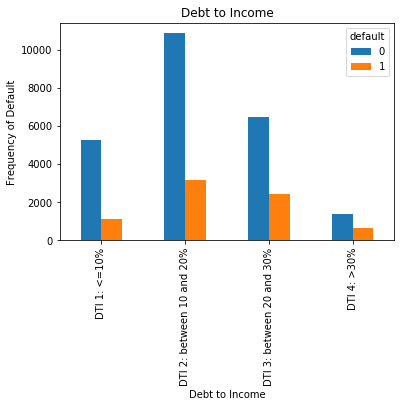

<IPython.core.display.Javascript object>

In [29]:
%matplotlib inline
pd.crosstab(data_dropna["Debt to Income v2"], data_dropna["default"]).plot(kind="bar")
plt.title("Debt to Income")
plt.xlabel("Debt to Income")
plt.ylabel("Frequency of Default")

#### Years in Current Job

In [30]:
data_dropna["Years in current job"] = data_dropna["Years in current job"].str.extract(
    r"(\d+)"
)
data_dropna["Years in current job"] = data_dropna["Years in current job"].astype(float)

<IPython.core.display.Javascript object>

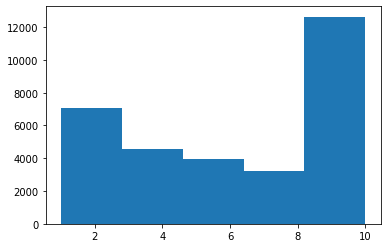

<IPython.core.display.Javascript object>

In [31]:
plt.hist(data_dropna["Years in current job"], bins=5)
plt.show()

In [32]:
data_dropna["Employment History"] = data_dropna["Years in current job"].apply(
    lambda x: "Job 1: <=1years"
    if x <= 1
    else ("Job 2: 1-8 years" if x > 1 and x < 8 else "Job 3: >=8 years")
)

<IPython.core.display.Javascript object>

In [33]:
pd.crosstab(data_dropna["Employment History"], data_dropna["default"])

default,0,1
Employment History,,
Job 1: <=1years,3174,1127
Job 2: 1-8 years,10000,3114
Job 3: >=8 years,10866,3207


<IPython.core.display.Javascript object>

In [34]:
pd.crosstab(data_dropna["Employment History"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Employment History,,
Job 1: <=1years,0.737968,0.262032
Job 2: 1-8 years,0.762544,0.237456
Job 3: >=8 years,0.772117,0.227883


<IPython.core.display.Javascript object>

#### Years of credit history

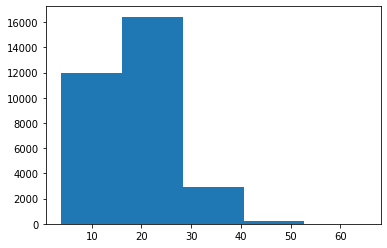

<IPython.core.display.Javascript object>

In [35]:
plt.hist(data_dropna["Years of Credit History"], bins=5)
plt.show()

In [36]:
data_dropna["Years of Credit History2"] = data_dropna["Years of Credit History"].apply(
    lambda x: "CrHistory 1: <10"
    if x <= 10
    else ("CrHistory 2: 10-20" if x > 10 and x < 20 else "CrHistory 3: >=20")
)

<IPython.core.display.Javascript object>

In [37]:
pd.crosstab(data_dropna["Years of Credit History2"], data_dropna["default"])

default,0,1
Years of Credit History2,,
CrHistory 1: <10,983,415
CrHistory 2: 10-20,14075,4465
CrHistory 3: >=20,8982,2568


<IPython.core.display.Javascript object>

In [38]:
pd.crosstab(data_dropna["Years of Credit History2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Years of Credit History2,,
CrHistory 1: <10,0.703147,0.296853
CrHistory 2: 10-20,0.759169,0.240831
CrHistory 3: >=20,0.777662,0.222338


<IPython.core.display.Javascript object>

#### Months since last delinquency

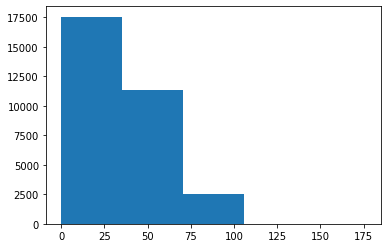

<IPython.core.display.Javascript object>

In [39]:
plt.hist(data_dropna["Months since last delinquent"], bins=5)
plt.show()

In [40]:
data_dropna["Months since last delinquent2"] = data_dropna[
    "Months since last delinquent"
].apply(lambda x: "DLQ 1: <=12" if x <= 12 else "DLQ 2: >12")

<IPython.core.display.Javascript object>

In [41]:
pd.crosstab(data_dropna["Months since last delinquent2"], data_dropna["default"])

default,0,1
Months since last delinquent2,,
DLQ 1: <=12,4238,1464
DLQ 2: >12,19802,5984


<IPython.core.display.Javascript object>

In [42]:
pd.crosstab(data_dropna["Months since last delinquent2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Months since last delinquent2,,
DLQ 1: <=12,0.743248,0.256752
DLQ 2: >12,0.767936,0.232064


<IPython.core.display.Javascript object>

#### Number of credit problems

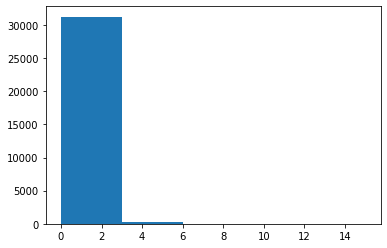

<IPython.core.display.Javascript object>

In [43]:
plt.hist(data_dropna["Number of Credit Problems"], bins=5)
plt.show()

In [44]:
data_dropna["Number of Credit Problems2"] = data_dropna[
    "Number of Credit Problems"
].apply(
    lambda x: "CrProblems 1: <=3" if x <= 3 else ("3" if x == 3 else "CrProblems 2: >3")
)

<IPython.core.display.Javascript object>

In [45]:
pd.crosstab(data_dropna["Number of Credit Problems2"], data_dropna["default"])

default,0,1
Number of Credit Problems2,,
CrProblems 1: <=3,23972,7419
CrProblems 2: >3,68,29


<IPython.core.display.Javascript object>

In [46]:
pd.crosstab(data_dropna["Number of Credit Problems2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Number of Credit Problems2,,
CrProblems 1: <=3,0.763658,0.236342
CrProblems 2: >3,0.701031,0.298969


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Frequency of Default')

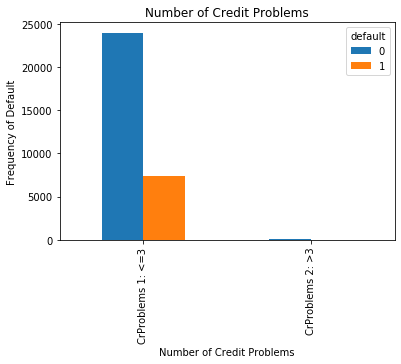

<IPython.core.display.Javascript object>

In [47]:
%matplotlib inline
pd.crosstab(data_dropna["Number of Credit Problems2"], data_dropna["default"]).plot(
    kind="bar"
)
plt.title("Number of Credit Problems")
plt.xlabel("Number of Credit Problems")
plt.ylabel("Frequency of Default")

#### Number of open accounts

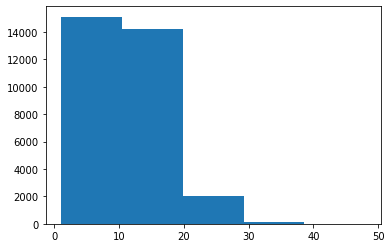

<IPython.core.display.Javascript object>

In [48]:
plt.hist(data_dropna["Number of Open Accounts"], bins=5)
plt.show()

In [49]:
data_dropna["Number of Open Accounts2"] = data_dropna["Number of Open Accounts"].apply(
    lambda x: "OpenAcc 1: <10"
    if x <= 10
    else ("OpenAcc 2: 10-20" if x > 10 and x < 20 else "OpenAcc 3: >=20")
)

<IPython.core.display.Javascript object>

In [50]:
pd.crosstab(data_dropna["Number of Open Accounts2"], data_dropna["default"])

default,0,1
Number of Open Accounts2,,
OpenAcc 1: <10,11664,3443
OpenAcc 2: 10-20,10773,3416
OpenAcc 3: >=20,1603,589


<IPython.core.display.Javascript object>

In [51]:
pd.crosstab(data_dropna["Number of Open Accounts2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Number of Open Accounts2,,
OpenAcc 1: <10,0.772092,0.227908
OpenAcc 2: 10-20,0.759250,0.240750
OpenAcc 3: >=20,0.731296,0.268704


<IPython.core.display.Javascript object>

#### Bankruptcies

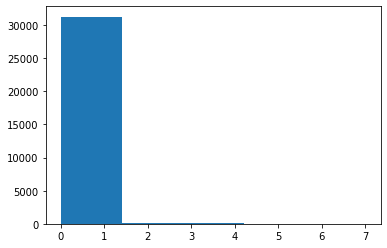

<IPython.core.display.Javascript object>

In [52]:
plt.hist(data_dropna["Bankruptcies"], bins=5)
plt.show()

In [53]:
data_dropna["Bankruptcies2"] = data_dropna["Bankruptcies"].apply(
    lambda x: "Bankruptcies 1: 0" if x == 0 else ("Bankruptcies 2: >0")
)

<IPython.core.display.Javascript object>

In [54]:
pd.crosstab(data_dropna["Bankruptcies2"], data_dropna["default"])

default,0,1
Bankruptcies2,,
Bankruptcies 1: 0,21498,6671
Bankruptcies 2: >0,2542,777


<IPython.core.display.Javascript object>

In [55]:
pd.crosstab(data_dropna["Bankruptcies2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Bankruptcies2,,
Bankruptcies 1: 0,0.763179,0.236821
Bankruptcies 2: >0,0.765893,0.234107


<IPython.core.display.Javascript object>

With this data the Bankruptcies feature doesn't show any discriminatory power.

#### Home Ownership

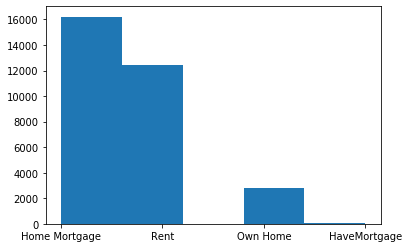

<IPython.core.display.Javascript object>

In [56]:
plt.hist(data_dropna["Home Ownership"], bins=5)
plt.show()

In [57]:
data_dropna["Home Ownership2"] = data_dropna["Home Ownership"].apply(
    lambda x: "HO 1: Own Home"
    if x == "Own Home"
    else ("HO 2: Rent" if x == "Rent" else "HO 3: Mortgage")
)

<IPython.core.display.Javascript object>

In [58]:
pd.crosstab(data_dropna["Home Ownership2"], data_dropna["default"])

default,0,1
Home Ownership2,,
HO 1: Own Home,2086,698
HO 2: Rent,9154,3266
HO 3: Mortgage,12800,3484


<IPython.core.display.Javascript object>

In [59]:
pd.crosstab(data_dropna["Home Ownership2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Home Ownership2,,
HO 1: Own Home,0.749282,0.250718
HO 2: Rent,0.737037,0.262963
HO 3: Mortgage,0.786048,0.213952


<IPython.core.display.Javascript object>

#### Purpose

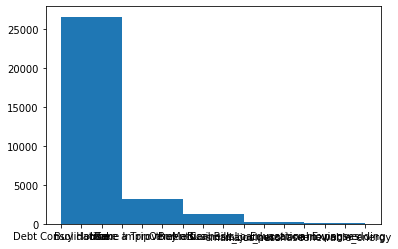

<IPython.core.display.Javascript object>

In [60]:
plt.hist(data_dropna["Purpose"], bins=5)
plt.show()

In [61]:
pd.crosstab(data_dropna["Purpose"], data_dropna["default"])

default,0,1
Purpose,,
Business Loan,385,166
Buy House,178,52
Buy a Car,308,57
Debt Consolidation,18505,5845
Educational Expenses,23,2
Home Improvements,1617,439
Medical Bills,296,97
Other,797,187
Take a Trip,150,36


<IPython.core.display.Javascript object>

In [62]:
pd.crosstab(data_dropna["Purpose"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Purpose,,
Business Loan,0.698730,0.301270
Buy House,0.773913,0.226087
Buy a Car,0.843836,0.156164
Debt Consolidation,0.759959,0.240041
Educational Expenses,0.920000,0.080000
Home Improvements,0.786479,0.213521
Medical Bills,0.753181,0.246819
Other,0.809959,0.190041
Take a Trip,0.806452,0.193548


<IPython.core.display.Javascript object>

In [63]:
data_dropna["Purpose2"] = data_dropna["Purpose"].apply(
    lambda x: "Purpose 1: Vacation"
    if (x == "vacation" or x == "Take a Trip")
    else (
        "Purpose 2: Business"
        if (x == "small_business" or x == "Business Loan")
        else (
            "Purpose 3: Debt Consolidation"
            if x == "Debt Consolidation"
            else (
                "Purpose 4: Home"
                if (x == "Buy House" or x == "Home Improvements")
                else ("Purpose 5: Car" if (x == "Buy a Car") else "Purpose 6: Other")
            )
        )
    )
)

<IPython.core.display.Javascript object>

In [64]:
pd.crosstab(data_dropna["Purpose2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Purpose2,,
Purpose 1: Vacation,0.793722,0.206278
Purpose 2: Business,0.677914,0.322086
Purpose 3: Debt Consolidation,0.759959,0.240041
Purpose 4: Home,0.785214,0.214786
Purpose 5: Car,0.843836,0.156164
Purpose 6: Other,0.778793,0.221207


<IPython.core.display.Javascript object>

#### Term

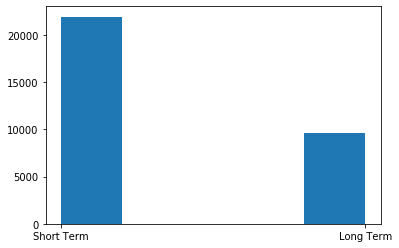

<IPython.core.display.Javascript object>

In [65]:
plt.hist(data_dropna["Term"], bins=5)
plt.show()

In [66]:
pd.crosstab(data_dropna["Term"], data_dropna["default"])

default,0,1
Term,,
Long Term,6716,2863
Short Term,17324,4585


<IPython.core.display.Javascript object>

In [67]:
pd.crosstab(data_dropna["Term"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Term,,
Long Term,0.701117,0.298883
Short Term,0.790725,0.209275


<IPython.core.display.Javascript object>

#### Tax Liens

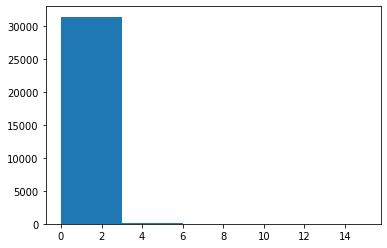

<IPython.core.display.Javascript object>

In [68]:
plt.hist(data_dropna["Tax Liens"], bins=5)
plt.show()

In [69]:
pd.crosstab(data_dropna["Tax Liens"], data_dropna["default"])

default,0,1
Tax Liens,,
0.0,23451,7238
1.0,418,138
2.0,111,41
3.0,29,13
4.0,18,11
5.0,4,5
6.0,5,0
7.0,3,1
9.0,0,1


<IPython.core.display.Javascript object>

In [70]:
data_dropna["Tax Liens2"] = data_dropna["Tax Liens"].apply(
    lambda x: "Tax Liens 1: 0" if x == 0 else "Tax Liens 2: >0"
)

<IPython.core.display.Javascript object>

In [71]:
pd.crosstab(data_dropna["Tax Liens2"], data_dropna["default"])

default,0,1
Tax Liens2,,
Tax Liens 1: 0,23451,7238
Tax Liens 2: >0,589,210


<IPython.core.display.Javascript object>

In [72]:
pd.crosstab(data_dropna["Tax Liens2"], data_dropna["default"]).apply(
    lambda r: r / r.sum(), axis=1
)

default,0,1
Tax Liens2,,
Tax Liens 1: 0,0.764150,0.235850
Tax Liens 2: >0,0.737171,0.262829


<IPython.core.display.Javascript object>

## Create buckets

#### Credit Score

In [73]:
data_dropna = data_dropna.join(
    pd.get_dummies(data_dropna["Credit Score"], drop_first=True)
)

<IPython.core.display.Javascript object>

In [74]:
data_dropna = data_dropna.rename(
    index=str,
    columns={
        "Average ": "Credit Average",
        "Good": "Credit Good",
        "Very Good": "Credit Very Good",
    },
)

<IPython.core.display.Javascript object>

In [75]:
data_dropna = data_dropna.drop(["Credit Score"], axis=1)

<IPython.core.display.Javascript object>

## Create Dummies

In [88]:
data_modelling = data_dropna[
    [
        "default",
        "Current Loan Amount",
        "Debt to Income v2",
        "Employment History",
        "Years of Credit History2",
        "Months since last delinquent2",
        "Number of Credit Problems2",
        "Number of Open Accounts2",
        "Home Ownership2",
        "Purpose2",
        "Term",
        "Tax Liens2",
    ]
]

<IPython.core.display.Javascript object>

In [89]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Current Loan Amount"], drop_first=True)
)
data_modelling = data_modelling.drop(["Current Loan Amount"], axis=1)

<IPython.core.display.Javascript object>

In [90]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Debt to Income v2"])
)
data_modelling = data_modelling.drop(["Debt to Income v2"], axis=1)

<IPython.core.display.Javascript object>

In [91]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Employment History"])
)
data_modelling = data_modelling.drop(["Employment History"], axis=1)

<IPython.core.display.Javascript object>

In [92]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Years of Credit History2"])
)
data_modelling = data_modelling.drop(["Years of Credit History2"], axis=1)

<IPython.core.display.Javascript object>

In [93]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Months since last delinquent2"])
)
data_modelling = data_modelling.drop(["Months since last delinquent2"], axis=1)

<IPython.core.display.Javascript object>

In [94]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Number of Credit Problems2"])
)
data_modelling = data_modelling.drop(["Number of Credit Problems2"], axis=1)

<IPython.core.display.Javascript object>

In [95]:
data_modelling = data_modelling.join(pd.get_dummies(data_modelling["Home Ownership2"]))
data_modelling = data_modelling.drop(["Home Ownership2"], axis=1)

<IPython.core.display.Javascript object>

In [96]:
data_modelling = data_modelling.join(pd.get_dummies(data_modelling["Purpose2"]))
data_modelling = data_modelling.drop(["Purpose2"], axis=1)

<IPython.core.display.Javascript object>

In [97]:
data_modelling = data_modelling.join(
    pd.get_dummies(data_modelling["Number of Open Accounts2"])
)
data_modelling = data_modelling.drop(["Number of Open Accounts2"], axis=1)

<IPython.core.display.Javascript object>

In [98]:
data_modelling = data_modelling.join(pd.get_dummies(data_modelling["Term"]))
data_modelling = data_modelling.drop(["Term"], axis=1)

<IPython.core.display.Javascript object>

In [99]:
data_modelling = data_modelling.join(pd.get_dummies(data_modelling["Tax Liens2"]))
data_modelling = data_modelling.drop(["Tax Liens2"], axis=1)

<IPython.core.display.Javascript object>

In [100]:
data_modelling.columns

Index(['default', 'LoanAmount 2: >100 000 and <=200 000 ',
       'LoanAmount 3: >200 000 and <=300 000 ',
       'LoanAmount 3: >300 000 and <=400 000 ',
       'LoanAmount 4: >400 000 and <=500 000 ', 'LoanAmount 5: >500 000 ',
       'DTI 1: <=10%', 'DTI 2: between 10 and 20%',
       'DTI 3: between 20 and 30%', 'DTI 4: >30%', 'Job 1: <=1years',
       'Job 2: 1-8 years', 'Job 3: >=8 years', 'CrHistory 1: <10',
       'CrHistory 2: 10-20', 'CrHistory 3: >=20', 'DLQ 1: <=12', 'DLQ 2: >12',
       'CrProblems 1: <=3', 'CrProblems 2: >3', 'HO 1: Own Home', 'HO 2: Rent',
       'HO 3: Mortgage', 'Purpose 1: Vacation', 'Purpose 2: Business',
       'Purpose 3: Debt Consolidation', 'Purpose 4: Home', 'Purpose 5: Car',
       'Purpose 6: Other', 'OpenAcc 1: <10', 'OpenAcc 2: 10-20',
       'OpenAcc 3: >=20', 'Long Term', 'Short Term', 'Tax Liens 1: 0',
       'Tax Liens 2: >0'],
      dtype='object')

<IPython.core.display.Javascript object>

## Logistic Regression

In [101]:
X = data_modelling.loc[:, data_modelling.columns != "default"]
y = data_modelling.loc[:, data_modelling.columns == "default"]

<IPython.core.display.Javascript object>

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

<IPython.core.display.Javascript object>

In [116]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Asus\.conda\envs\py37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [117]:
y_pred = logreg.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.5f}".format(
        logreg.score(X_test, y_test)
    )
)

Accuracy of logistic regression classifier on test set: 0.76003


<IPython.core.display.Javascript object>

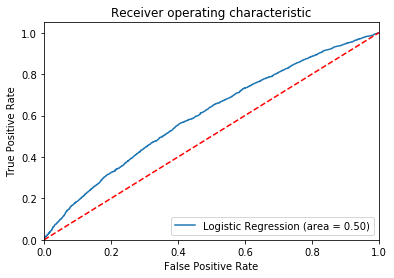

<IPython.core.display.Javascript object>

In [118]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

## KNN

In [123]:
knnclassifier = KNeighborsClassifier(n_neighbors=int(X.shape[1] / 2))
knnclassifier.fit(X_train, y_train)
prediction = knnclassifier.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, prediction))

C:\Users\Asus\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy Score:  0.7546310998200487


<IPython.core.display.Javascript object>

## SVC

In [124]:
from sklearn.svm import SVC

clf = SVC(gamma="auto", kernel="linear")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

C:\Users\Asus\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.7600296390388483


<IPython.core.display.Javascript object>

## Decision Tree Classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

In [135]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.7352598708584736


<IPython.core.display.Javascript object>

In [136]:
pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

## Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [144]:
# 1000 decision trees
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.7375886524822695


<IPython.core.display.Javascript object>